In [17]:
#Import the libraries
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout, Input
import matplotlib.pyplot as plt
import datetime

In [2]:
start = '2012-01-01'
end = '2024-01-01'
stock = 'AAPL'

df = yf.download(stock, start, end)
df.reset_index(inplace=True)
df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.402627,302220800
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.469275,260022000
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.607715,271269600
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.739511,318292800
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.719306,394024400
...,...,...,...,...,...,...,...
3013,2023-12-22,195.179993,195.410004,192.970001,193.600006,192.868134,37122800
3014,2023-12-26,193.610001,193.889999,192.830002,193.050003,192.320221,28919300
3015,2023-12-27,192.490005,193.500000,191.089996,193.149994,192.419830,48087700
3016,2023-12-28,194.139999,194.660004,193.169998,193.580002,192.848221,34049900


In [3]:
#Get the number of rows and columns

df.shape

(3018, 7)

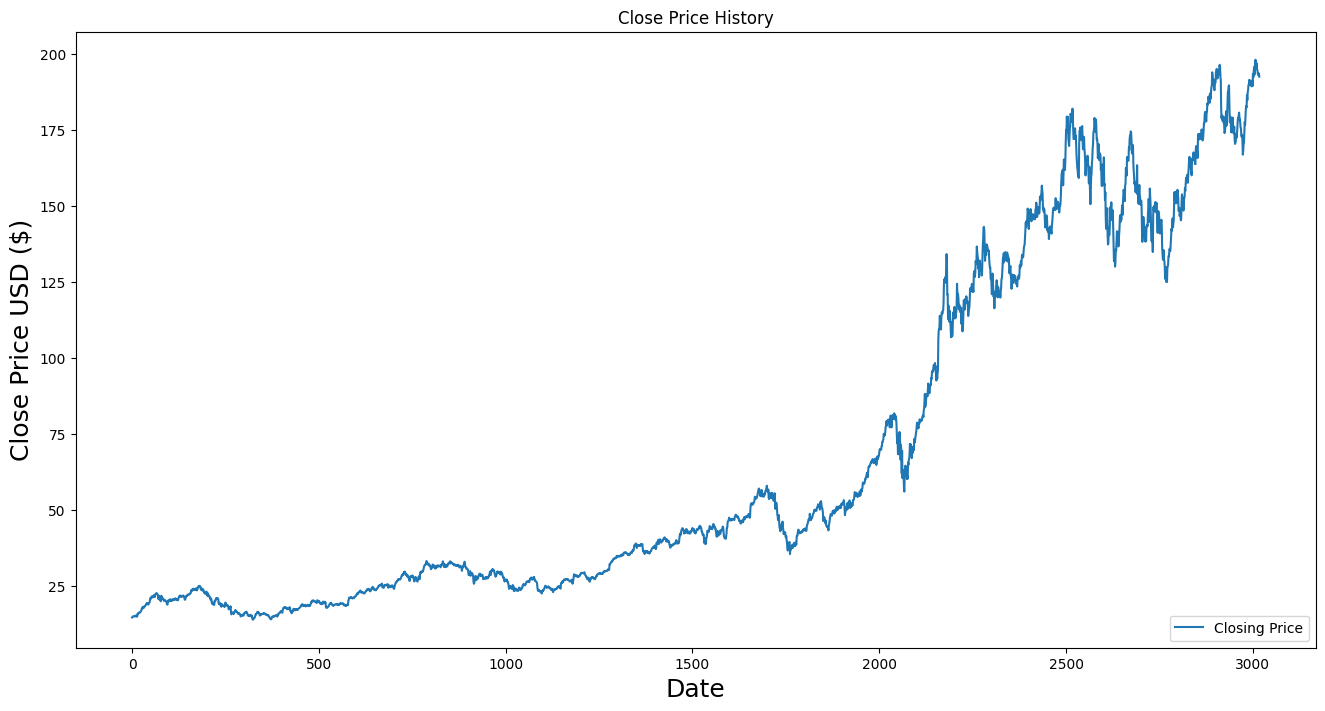

In [4]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(df['Close'])
plt.xlabel("Date",fontsize=18)
plt.ylabel("Close Price USD ($)",fontsize=18)
plt.legend(['Closing Price'],loc = "lower right")
plt.show()

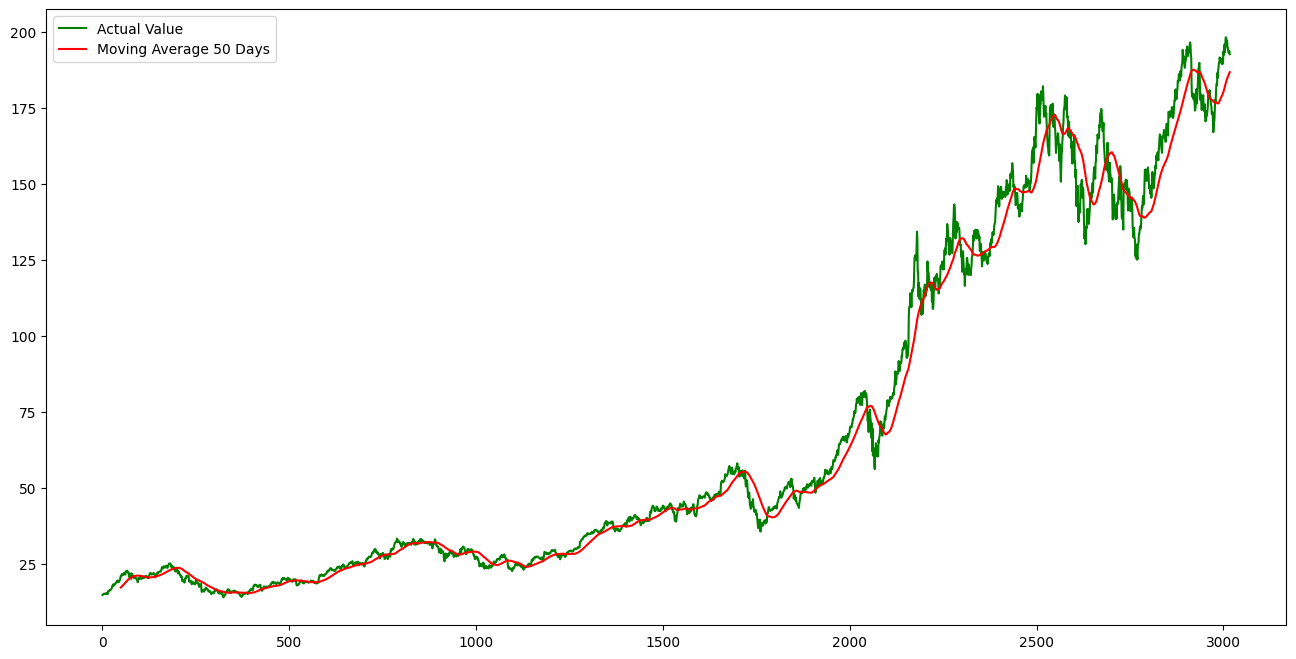

In [5]:
ma_50_days = df.Close.rolling(50).mean()
plt.figure(figsize=(16,8))
plt.plot(df.Close, 'g')
plt.plot(ma_50_days, 'r')
plt.legend(['Actual Value','Moving Average 50 Days'],loc = 'upper left')
plt.show()

In [6]:
ma_100_days = df.Close.rolling(100).mean()

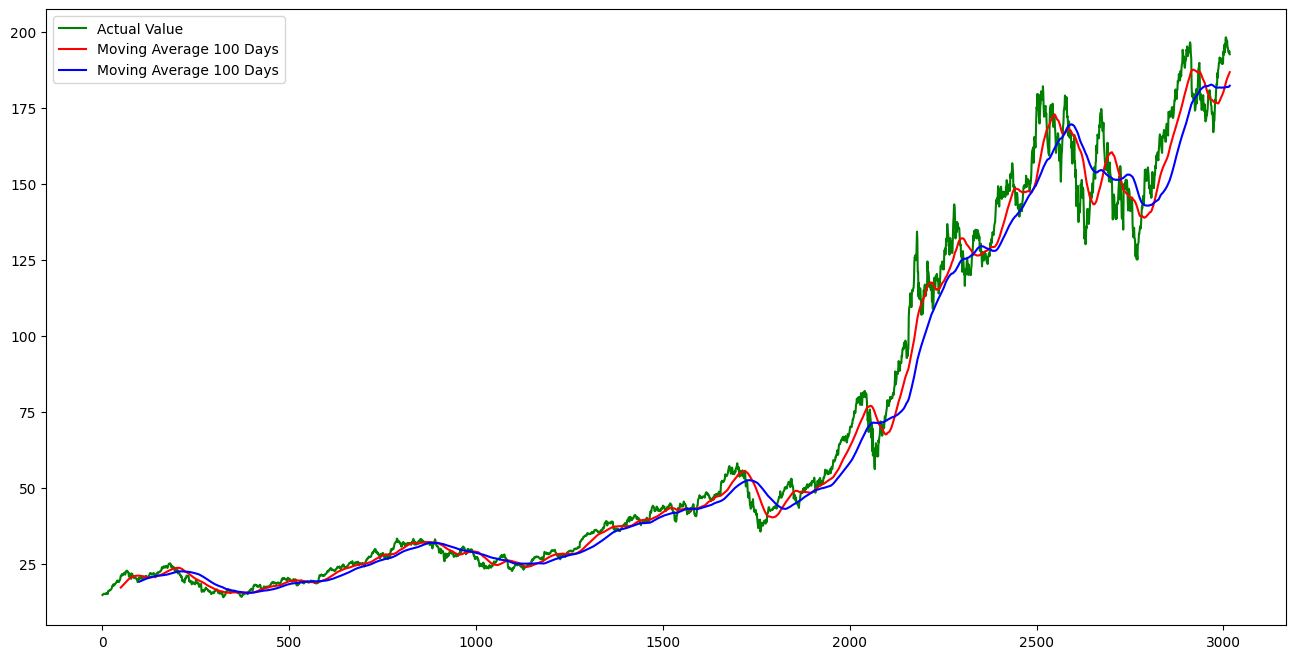

In [7]:
plt.figure(figsize=(16,8))
plt.plot(df.Close, 'g')
plt.plot(ma_50_days, 'r')
plt.plot(ma_100_days, 'b')
plt.legend(['Actual Value','Moving Average 100 Days','Moving Average 100 Days'],loc = 'upper left')
plt.show()

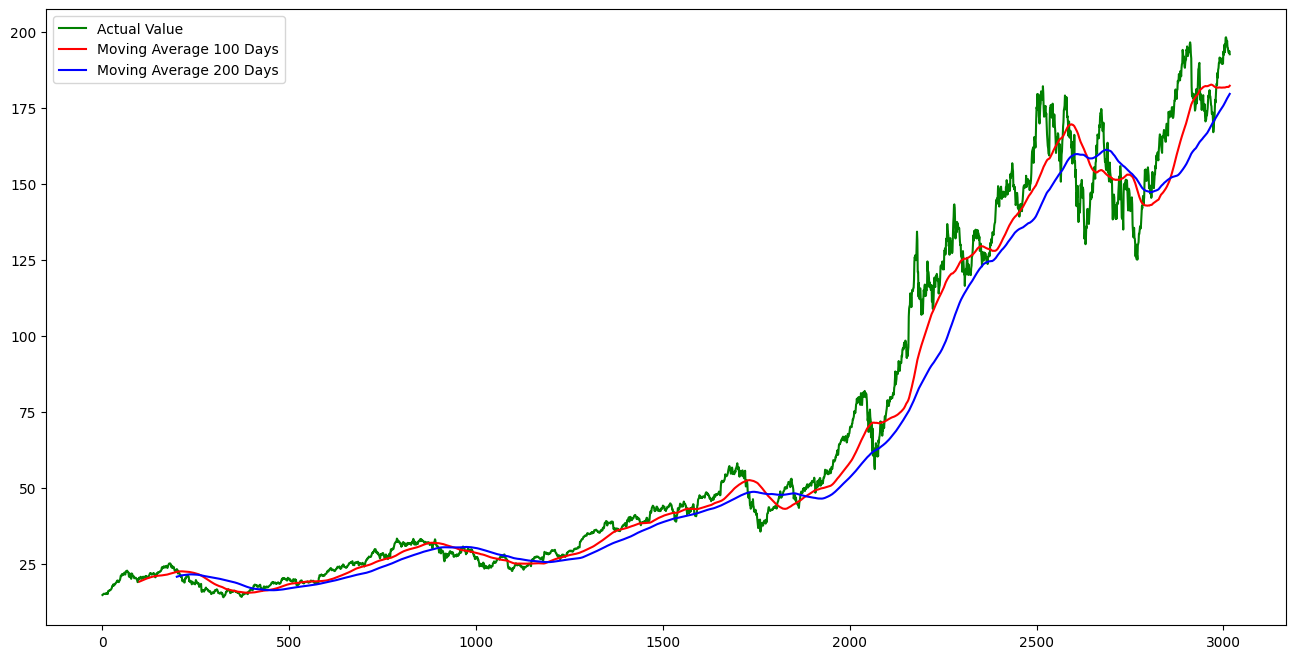

In [8]:
ma_200_days = df.Close.rolling(200).mean()
# plt.figure(figsize=(8,6))
plt.figure(figsize=(16,8))
plt.plot(df.Close,'g')
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.legend(['Actual Value','Moving Average 100 Days','Moving Average 200 Days'],loc = 'upper left')
plt.show()

In [9]:
#Create a new dataframe with only the Close column
data = df.filter(['Close'])
#Convert a dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8);
training_data_len

2415

In [10]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00401431],
       [0.00444289],
       [0.00533302],
       ...,
       [0.97306723],
       [0.97540217],
       [0.96970066]])

In [12]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len,:]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(100,len(train_data)):
  x_train.append(train_data[i-100:i,0])
  y_train.append(train_data[i,0])
  if i <= 100:
    print(x_train)
    print(y_train)
    print()

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.00577323, 0.00715207, 0.00579457,
       0.01088518, 0.01049151, 0.01100542, 0.01211663, 0.01278955,
       0.01273332, 0.01252582, 0.01341013, 0.01424207, 0.01518457,
       0.01670691, 0.01990478, 0.01995326, 0.02173353, 0.02306387,
       0.02077746, 0.02165789, 0.02164044, 0.02410915, 0.02375813,
       0.02440779, 0.02557523, 0.0262249 , 0.02809631, 0.02945961,
       0.02985329, 0.02999098, 0.02765997, 0.02709757, 0.02718096,
       0.02937236, 0.02998905, 0.03131358, 0.03443581, 0.03860139,
       0.0378218 , 0.03782373, 0.04083544, 0.04177794, 0.04110694,
       0.04049413, 0.03985611, 0.04197573, 0.0434302 , 0.04403914,
       0.04253425, 0.04053485, 0.044235  , 0.04630809, 0.04533651,
       0.04715362, 0.04764813, 0.04613744, 0.04570304, 0.04503786,
       0.04163636, 0.03676877, 0.04250322, 0.04223948, 0.0381

In [13]:
#Convert the x_train and y_train to numpy arrays
x_train,y_train = np.array(x_train),np.array(y_train)

In [14]:
#Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1], 1))
x_train.shape

(2315, 100, 1)

In [18]:
# model = Sequential()
# model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
#                input_shape = ((x_train.shape[1],1))))
# model.add(Dropout(0.2))

# model.add(LSTM(units = 60, activation='relu', return_sequences = True))
# model.add(Dropout(0.3))

# model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
# model.add(Dropout(0.4))

# model.add(LSTM(units = 120, activation = 'relu'))
# model.add(Dropout(0.5))

# model.add(Dense(units = 1))
#Build the LSTM Model
model = Sequential()

# Add an Input layer
model.add(Input(shape=(x_train.shape[1], 1)))

# LSTM layers
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))

# Dense layers
model.add(Dense(25))
model.add(Dense(1))

In [19]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [20]:
model.fit(x_train,y_train, epochs = 50, batch_size =32, verbose = 1)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 0.0101
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 1.9934e-04
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 1.9093e-04
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 1.6459e-04
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 1.7739e-04
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 1.7965e-04
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 1.6896e-04
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 1.5142e-04
Epoch 9/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 1.2457e-04
Epoch 10/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 1.3538e-04
Epoch 11/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 1.3964e-04
Epoch 12/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 1.2746e-04
Epoch 13/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 1.1863e-04
Epoch 14/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 9.8433e-05
Epoch 15/50
73/73 ━

In [21]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,705 (373.85 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,804 (249.24 KB)

In [22]:
#Create the testing dataset
#Create a new array containing scaled values
test_data = scaled_data[training_data_len - 100: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :]

for i in range(100,len(test_data)):
  x_test.append(test_data[i-100:i,0])

In [23]:
#Convert the data into a numpy array
x_test = np.array(x_test)
x_test.shape

(603, 100)

In [24]:
#Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
# x_test.shape
y_test.shape

(603, 1)

In [25]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions.shape

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


(603, 1)

In [26]:
#Get the root mean squared error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.065334301089766

Mean Absolute Percentage Error (MAPE): 1.5597503196589555


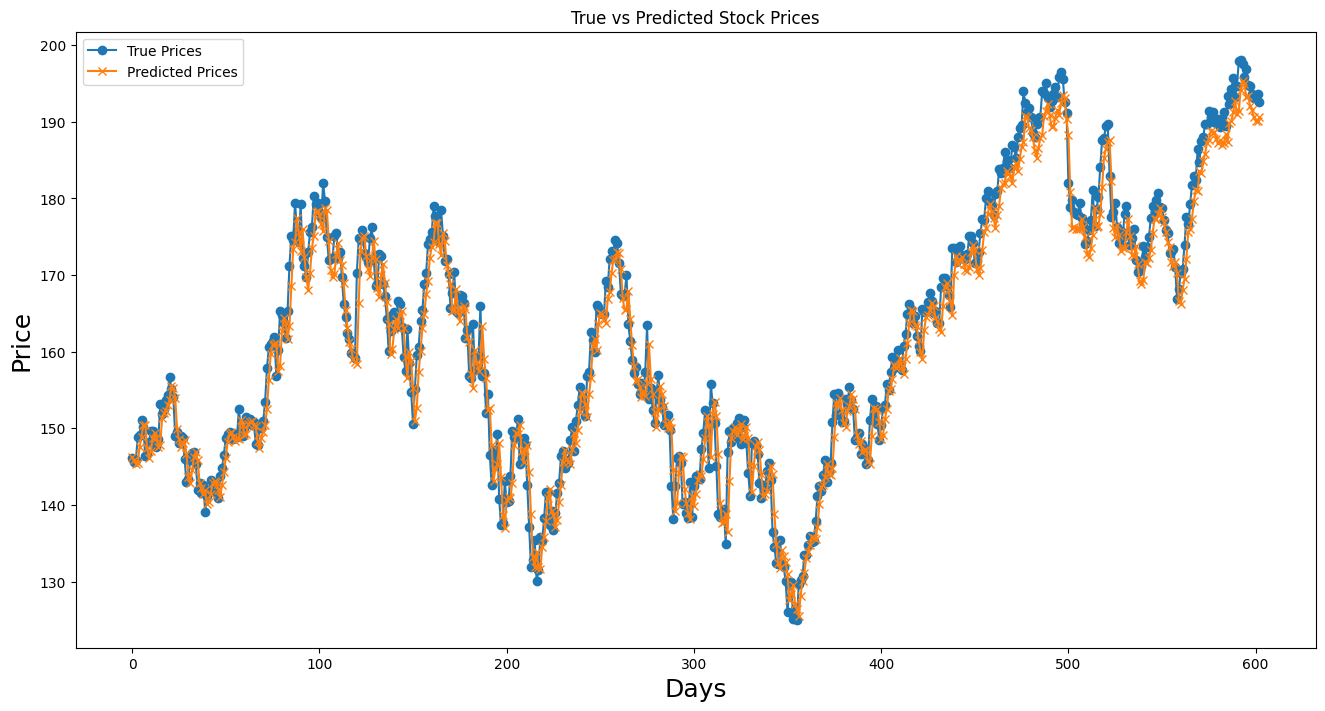

In [28]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, predictions)

print("Mean Absolute Percentage Error (MAPE):", mape)

# Plot the true prices and predicted prices
plt.figure(figsize=(16,8))
plt.plot(y_test, label='True Prices', marker='o')
plt.plot(predictions, label='Predicted Prices', marker='x')
plt.xlabel('Days',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.title('True vs Predicted Stock Prices')
plt.legend()
plt.show()



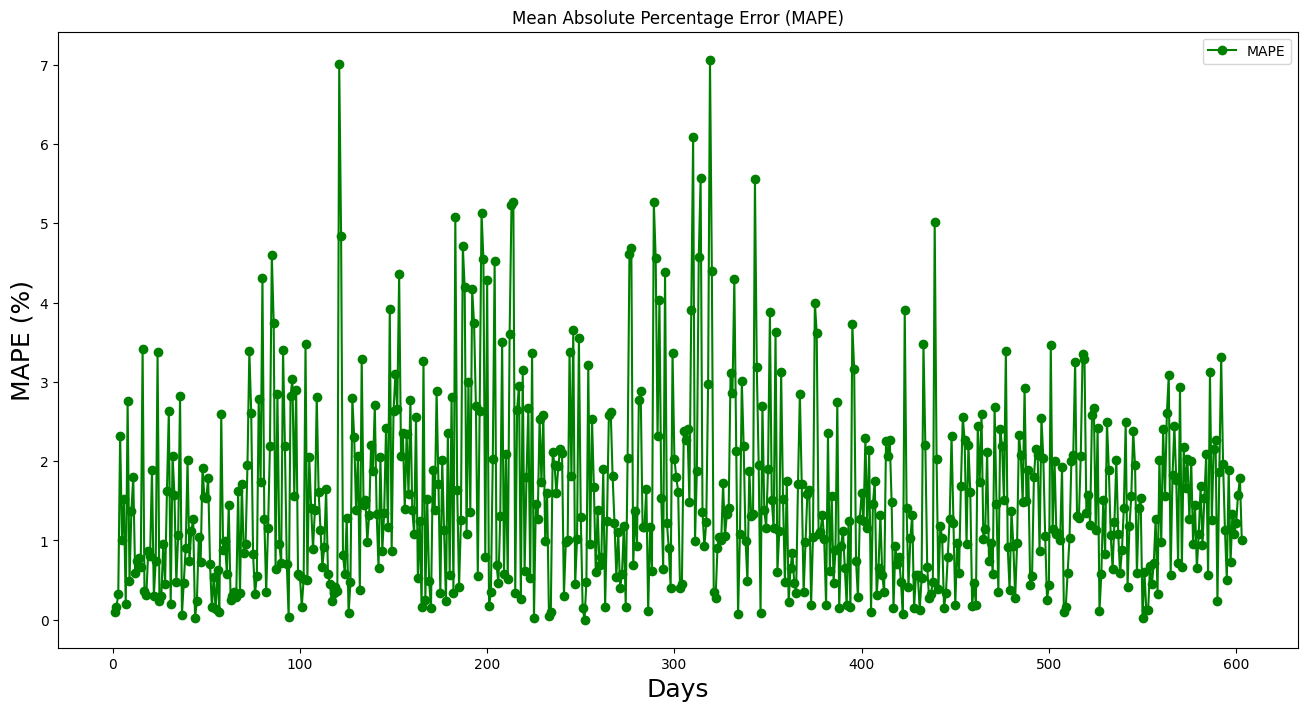

In [29]:
# Plot the Mean Absolute Percentage Error (MAPE)
plt.figure(figsize=(16,8))
plt.plot(np.arange(1, len(y_test) + 1), np.abs((np.array(y_test) - np.array(predictions)) / np.array(y_test)) * 100, label='MAPE', marker='o', color='green')
plt.xlabel('Days',fontsize=18)
plt.ylabel('MAPE (%)',fontsize=18)
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.legend()
plt.show()

C:\Users\dubey\AppData\Local\Temp\ipykernel_17732\1945113730.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


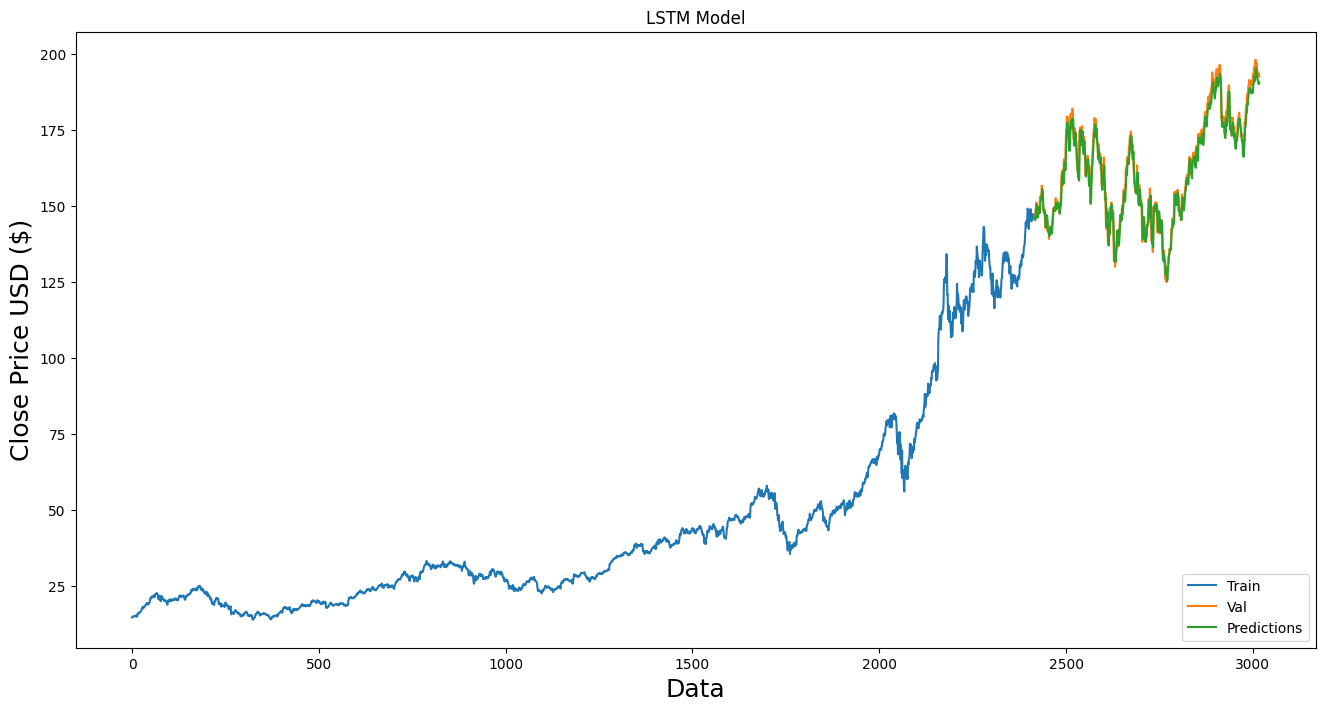

In [30]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title("LSTM Model")
plt.xlabel("Data",fontsize=18)
plt.ylabel("Close Price USD ($)",fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close",'Predictions']])
plt.legend(['Train','Val','Predictions'],loc = 'lower right')
plt.show()

In [31]:
#Show the valid and predicted prices
valid

,Close,Predictions
2415,146.089996,146.232590
2416,145.600006,145.827667
2417,145.860001,145.391663
2418,148.889999,145.432114
2419,149.100006,147.601791
...,...,...
3013,193.600006,191.512436
3014,193.050003,190.688889
3015,193.149994,190.100388
3016,193.580002,190.122696


In [32]:
#Get the quote
start = '2012-01-01'
end = datetime.datetime.now().date()
stock = 'AAPL'
df1 = yf.download(stock, start, end)
new_df = df1.filter(["Close"])
#Get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#Get the preidcted scaled price
pred_price = model.predict(X_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
[[227.92848]]


In [33]:
#Get the quote
# start = datetime.datetime.now().date()
# end = datetime.datetime.now().date()
# stock = 'AAPL'
# df2 = yf.download(stock, start, end)
# print(df2["Close"])
model.save('Stock Price Prediction Model.keras')